True if:

 or - at least one True

 and - both True

 xor - different

In [4]:
import numpy as np

In [5]:
class SimpleNeuralNetwork:
    def __init__(self):
        np.random.seed(1)
        # provide a starting point for learning
        self.weights = 2 * np.random.random((3, 1)) - 1

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def sigmoid_derivative(self, x):
        return x * (1 - x)

    def train(self, inputs, outputs, iterations):
        for _ in range(iterations):
            # Forward propagation
            output = self.think(inputs)

            # Calculate error
            error = outputs - output

            # Backpropagation
            adjustments = np.dot(inputs.T, error * self.sigmoid_derivative(output))

            # Update weights
            self.weights += adjustments

    def think(self, inputs):
        # Forward propagation
        return self.sigmoid(np.dot(inputs, self.weights))


In [6]:
neural_network = SimpleNeuralNetwork()

# Training data
# Each row is a training example
# First two columns are input features, third column is bias term
training_inputs = np.array([
    [0, 0, 1],
    [1, 1, 1],
    [1, 0, 1],
    [0, 1, 1]
])

# 'correct' answers
training_outputs = np.array([[0, 1, 1, 0]]).T

print("Random starting weights:")
print(neural_network.weights)

Random starting weights:
[[-0.16595599]
 [ 0.44064899]
 [-0.99977125]]


In [7]:
neural_network.train(training_inputs, training_outputs, 10000)

In [8]:
print("Testing all possible input combinations:")
# combos and weight
test_cases = [
    [0, 0, 1],
    [0, 1, 1],
    [1, 0, 1],
    [1, 1, 1]
]

for test in test_cases:
    prediction = neural_network.think(np.array(test))
    print(f"Input: {test[0]}, {test[1]} → Prediction: {prediction[0]:.4f}")

Testing all possible input combinations:
Input: 0, 0 → Prediction: 0.0097
Input: 0, 1 → Prediction: 0.0079
Input: 1, 0 → Prediction: 0.9936
Input: 1, 1 → Prediction: 0.9921


This example demonstrates several key concepts of neural networks:

	1.	Initialization: The network is initialized with random weights.

	2.	Forward Propagation: The think method implements forward propagation, where inputs are multiplied by weights and passed through an activation function (sigmoid in this case).

	3.	Activation Function: We use the sigmoid function as our activation function, which helps introduce non-linearity into the network.

	4.	Training: The network learns through:

	▪	Forward propagation
	▪	Error calculation
	▪	Backpropagation
	▪	Weight adjustment

	5.	Prediction: After training, the network can make predictions on new data.

Key components explained:
	•	The network has 3 input neurons (2 for features, 1 for bias) and 1 output neuron
	•	It uses the sigmoid activation function: f(x) = 1/(1 + e^(-x))
	•	The training process adjusts weights to minimize the error between predicted and actual outputs
	•	Backpropagation uses the derivative of the sigmoid function to determine how to adjust weights


In [9]:
import matplotlib.pyplot as plt

class NeuralNetworkWithVisuals(SimpleNeuralNetwork):
    def __init__(self):
        super().__init__()
        self.weight_history = []
        self.error_history = []

    def train(self, inputs, outputs, iterations):
        for i in range(iterations):
            output = self.sigmoid(np.dot(inputs, self.weights))
            error = outputs - output

            # Store weights and error for visualization
            self.weight_history.append(self.weights.copy())
            self.error_history.append(np.mean(np.abs(error)))

            adjustments = np.dot(inputs.T, error * output * (1 - output))
            self.weights += adjustments

    def plot_learning(self):
        plt.figure(figsize=(15, 5))

        # Plot weight changes
        plt.subplot(1, 2, 1)
        weight_history = np.array(self.weight_history)
        for i in range(3):
            plt.plot(weight_history[:, i], label=f'Weight {i+1}')
        plt.title('Weight Changes During Training')
        plt.xlabel('Training Iteration')
        plt.ylabel('Weight Value')
        plt.legend()
        plt.grid(True)

        # Plot error reduction
        plt.subplot(1, 2, 2)
        plt.plot(self.error_history)
        plt.title('Error Reduction During Training')
        plt.xlabel('Training Iteration')
        plt.ylabel('Average Error')
        plt.grid(True)

        plt.tight_layout()
        plt.show()


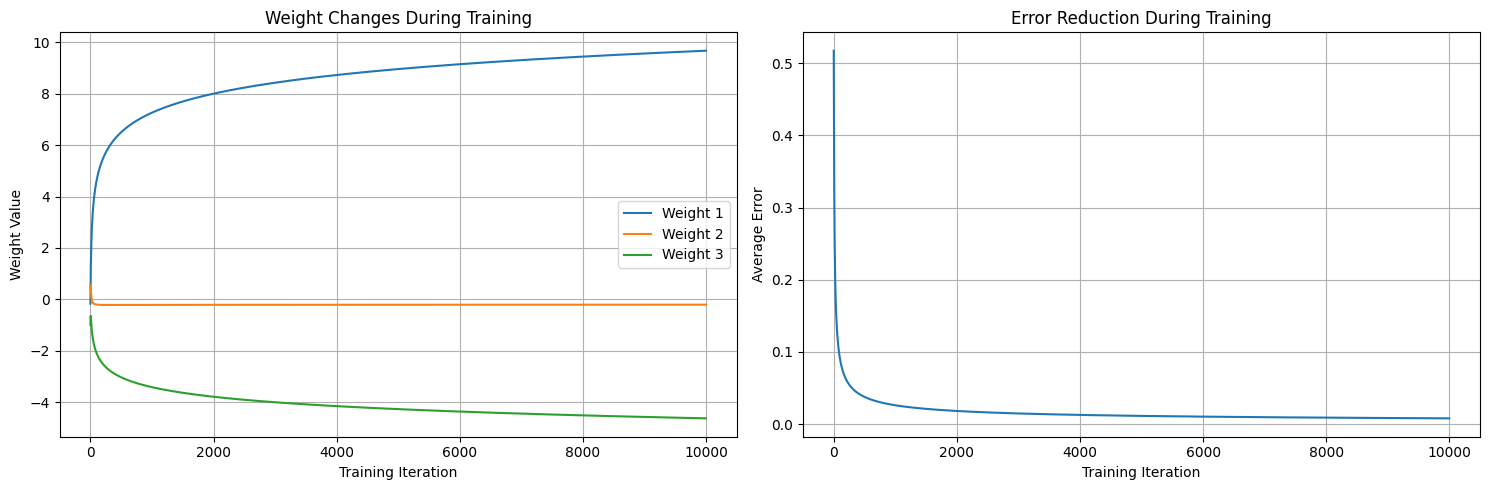

In [11]:
nn_visual = NeuralNetworkWithVisuals()
nn_visual.train(training_inputs, training_outputs, 10000)
nn_visual.plot_learning()
